In [2]:
import pandas as pd
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import matplotlib.pyplot as plt

In [4]:
pwd

'c:\\Users\\johan\\OneDrive - Uppsala universitet\\Dokument\\Termin 6\\Examensarbete\\Examensarbete_analys\\Examensarbete_analys'

<h1>Inl√§sning, transformering och kontroll av data</h1>

In [5]:

df = pd.read_csv("138svar.csv", encoding="utf-8", delimiter = ",")

In [6]:
# df = df.drop(df.index[:3])
# df = df.reset_index(drop=True)

In [7]:
df.drop(columns="Tidst√§mpel", axis=1, inplace=True)

In [8]:
kolumner_att_konvertera = df.columns[:4]

# Konvertera datatypen f√∂r de valda kolumnerna till 'category'
df[kolumner_att_konvertera] = df[kolumner_att_konvertera].astype('category')


In [9]:
df['Hur m√•nga inv√•nare har orten d√§r du bor?'] = df['Hur m√•nga inv√•nare har orten d√§r du bor?'].replace({
    "0-10 000": "liten",
    "10-50 000": "liten",
    "50-100 000": "medel",
    "100-200 000": "stor",
    "200 000+": "stor"
})

C:\Users\johan\AppData\Local\Temp\ipykernel_29632\2101176683.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Hur m√•nga inv√•nare har orten d√§r du bor?'] = df['Hur m√•nga inv√•nare har orten d√§r du bor?'].replace({


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 41 columns):
 #   Column                                                                                                              Non-Null Count  Dtype   
---  ------                                                                                                              --------------  -----   
 0   K√∂n                                                                                                                 133 non-null    category
 1   Vilken √•rskurs g√•r du i?                                                                                            133 non-null    category
 2   Vilket av f√∂ljande beskriver b√§st ditt program?                                                                     133 non-null    category
 3   Hur m√•nga inv√•nare har orten d√§r du bor?                                                                            133 non-null    category
 4   Jag k√

In [11]:
df.head()

K√∂n  Vilken √•rskurs g√•r du i?  \
0     Man                √Örskurs 3   
1     Man                √Örskurs 3   
2  Kvinna                √Örskurs 3   
3  Kvinna                √Örskurs 3   
4  Kvinna                √Örskurs 3   

  Vilket av f√∂ljande beskriver b√§st ditt program?   \
0                                   Naturvetenskap   
1                                Samh√§llsvetenskap   
2                                   Naturvetenskap   
3                                Samh√§llsvetenskap   
4                                   Naturvetenskap   

  Hur m√•nga inv√•nare har orten d√§r du bor?  Jag k√§nner till GDPR.   \
0                                    medel                       5   
1                                    medel                       1   
2                                    liten                       5   
3                                    liten                       5   
4                                    liten                       6   

   Jag litar p√• att hemsidor hanterar mina personuppgifter p√• ett ansvarsfullt s√§tt.    \
0                                                  5                                     
1                                                  7                                     
2                                                  4                                     
3                                                  3                                     
4                                                  6                                     

   Jag v√§ljer "Godk√§nn alla cookies".  Jag v√§ljer "Till√•t alla".   \
0                                   7                           7   
1                                   7                           7   
2                                   7                           7   
3                                   7                           7   
4                                   5                           7   

   Jag v√§ljer "Acceptera alla cookies".   \
0                                      3   
1                                      5   
2                                      7   
3                                      7   
4                                      6   

   Jag v√§ljer "Acceptera alla cookies". .1  ...  \
0                                        7  ...   
1                                        7  ...   
2                                        7  ...   
3                                        7  ...   
4                                        7  ...   

   Jag √§r omsorgsfull med vilka uppgifter jag l√§mnar till hemsidor.   \
0                                                  2                   
1                                                  3                   
2                                                  7                   
3                                                  3                   
4                                                  5                   

   Jag bryr mig om att f√∂retag samlar in information om mig som person.   \
0                                                  6                       
1                                                  6                       
2                                                  6                       
3                                                  5                       
4                                                  4                       

   Jag bryr mig om att f√∂retag samlar in information om mitt beteende online.   \
0                                                  6                             
1                                                  5                             
2                                                  5                             
3                                                  5                             
4                                                  4                             

   Jag k√§nner oro √∂ver att information som samlas in via cookies kan anv√§ndas p√• ett f

In [12]:
kolumner_att_√§ndra = df.columns[[6, 7, 8, 9, 10, 40]]

df[kolumner_att_√§ndra] = df[kolumner_att_√§ndra].replace({
    7: 1,
    6: 2,
    5: 3,
    3: 5,
    2: 6,
    7: 1
})

In [13]:
print(kolumner_att_√§ndra)

Index(['Jag v√§ljer "Godk√§nn alla cookies".', 'Jag v√§ljer "Till√•t alla". ',
       'Jag v√§ljer "Acceptera alla cookies". ',
       'Jag v√§ljer "Acceptera alla cookies". .1',
       'Jag v√§ljer "Till√•t alla". .1',
       'Jag tycker att det √§r rimligt att betala med personlig data ist√§llet f√∂r pengar f√∂r att anv√§nda tj√§nster online. '],
      dtype='object')


In [14]:
df.head()

K√∂n  Vilken √•rskurs g√•r du i?  \
0     Man                √Örskurs 3   
1     Man                √Örskurs 3   
2  Kvinna                √Örskurs 3   
3  Kvinna                √Örskurs 3   
4  Kvinna                √Örskurs 3   

  Vilket av f√∂ljande beskriver b√§st ditt program?   \
0                                   Naturvetenskap   
1                                Samh√§llsvetenskap   
2                                   Naturvetenskap   
3                                Samh√§llsvetenskap   
4                                   Naturvetenskap   

  Hur m√•nga inv√•nare har orten d√§r du bor?  Jag k√§nner till GDPR.   \
0                                    medel                       5   
1                                    medel                       1   
2                                    liten                       5   
3                                    liten                       5   
4                                    liten                       6   

   Jag litar p√• att hemsidor hanterar mina personuppgifter p√• ett ansvarsfullt s√§tt.    \
0                                                  5                                     
1                                                  7                                     
2                                                  4                                     
3                                                  3                                     
4                                                  6                                     

   Jag v√§ljer "Godk√§nn alla cookies".  Jag v√§ljer "Till√•t alla".   \
0                                   1                           1   
1                                   1                           1   
2                                   1                           1   
3                                   1                           1   
4                                   3                           1   

   Jag v√§ljer "Acceptera alla cookies".   \
0                                      5   
1                                      3   
2                                      1   
3                                      1   
4                                      2   

   Jag v√§ljer "Acceptera alla cookies". .1  ...  \
0                                        1  ...   
1                                        1  ...   
2                                        1  ...   
3                                        1  ...   
4                                        1  ...   

   Jag √§r omsorgsfull med vilka uppgifter jag l√§mnar till hemsidor.   \
0                                                  2                   
1                                                  3                   
2                                                  7                   
3                                                  3                   
4                                                  5                   

   Jag bryr mig om att f√∂retag samlar in information om mig som person.   \
0                                                  6                       
1                                                  6                       
2                                                  6                       
3                                                  5                       
4                                                  4                       

   Jag bryr mig om att f√∂retag samlar in information om mitt beteende online.   \
0                                                  6                             
1                                                  5                             
2                                                  5                             
3                                                  5                             
4                                                  4                             

   Jag k√§nner oro √∂ver att information som samlas in via cookies kan anv√§ndas p√• ett f

<h1>Kategorisering</h1>

In [15]:
df_demografi = df.iloc[:,:6]

In [16]:
# V√§lj kolumnerna med index 19 till 27 (slutet √§r exklusivt s√• vi tar upp till 28)
utvalda_k = df.iloc[:, 17:29]
utvalda_k1 = df.iloc[:, 17:23]
utvalda_k2 = df.iloc[:, 23:29]
utvalda_a = df.iloc[:, 29:]
utvalda_a1 = df.iloc[:, 29:37]
utvalda_a2 = df.iloc[:, 37:]
utvalda_b = df.iloc[:, 6:17]
utvalda_b1_dark = df.iloc[:,[6,7,9]]
utvalda_b1_no_dark = df.iloc[:,[8,10]]
utvalda_b2 = df.iloc[:, 11:14]
utvalda_b3 = df.iloc[:, 14:17]


# Platta ut alla v√§rden till en l√•ng array och r√§kna ut medelv√§rde
medelv√§rde_k = utvalda_k.values.flatten().mean()
medelv√§rde_k1 = utvalda_k1.values.flatten().mean()
medelv√§rde_k2 = utvalda_k2.values.flatten().mean()
medelv√§rde_a = utvalda_a.values.flatten().mean()
medelv√§rde_a1 = utvalda_a1.values.flatten().mean()
medelv√§rde_a2 = utvalda_a2.values.flatten().mean()
medelv√§rde_b = utvalda_b.values.flatten().mean()
medelv√§rde_b1_dark = utvalda_b1_dark.values.flatten().mean()
medelv√§rde_b1_no_dark = utvalda_b1_no_dark.values.flatten().mean()
medelv√§rde_b2 = utvalda_b2.values.flatten().mean()
medelv√§rde_b3 = utvalda_b3.values.flatten().mean()

# Skapa ny DataFrame med en kolumn "K" och medelv√§rdet som enda v√§rde
df_kategoriserad = pd.DataFrame({
                      'K': [medelv√§rde_k],
                      'K_grundl√§ggande': [medelv√§rde_k1],
                      'K_integritet': [medelv√§rde_k2],
                      'A': [medelv√§rde_a],
                      'A_egen_data': [medelv√§rde_a1],
                      'A_gen_insamling': [medelv√§rde_a2],
                      'B': [medelv√§rde_b],
                      'B_bilder_dark': [medelv√§rde_b1_dark],
                      'B_bilder_no_dark': [medelv√§rde_b1_no_dark],
                      'B2_agerande': [medelv√§rde_b2],
                      'B3_aktivt agerande': [medelv√§rde_b3]
                      })

In [17]:
df_kategoriserad.head()

K  K_grundl√§ggande  K_integritet         A  A_egen_data  \
0  3.711153         3.552632      3.869674  4.224937     4.084586   

   A_gen_insamling         B  B_bilder_dark  B_bilder_no_dark  B2_agerande  \
0         4.505639  2.343814       1.859649          2.161654     2.897243   

   B3_aktivt agerande  
0             2.39599

In [18]:

medel_k = df.iloc[:, 17:29].mean(axis=1).round(2)
medel_k1 = df.iloc[:, 17:23].mean(axis=1)
medel_k2 = df.iloc[:, 23:29].mean(axis=1)
medel_a = df.iloc[:, 29:].mean(axis=1)
medel_a1 = df.iloc[:, 29:37].mean(axis=1)
medel_a2 = df.iloc[:, 37:].mean(axis=1)
medel_b = df.iloc[:, 6:17].mean(axis=1)
medel_b1_dark = df.iloc[:,[6,7,9]].mean(axis=1)
medel_b1_no_dark = df.iloc[:,[8,10]].mean(axis=1)
medel_b2 = df.iloc[:, 11:14].mean(axis=1)
medel_b3 = df.iloc[:, 14:17].mean(axis=1)


df_resp_sum = pd.DataFrame({
                      'K√∂n': df.iloc[:,0],
                      '√Örskurs': df.iloc[:,1],
                      'Program': df.iloc[:,2],
                      'Inv√•nare': df.iloc[:,3],
                      'K': medel_k,
                      'K_grundl√§ggande': medel_k1,
                      'K_integritet': medel_k2,
                      'A': medel_a,
                      'A_egen_data': medel_a1,
                      'A_gen_insamling': medel_a2,
                      'B': medel_b,
                      'B_bilder_dark': medel_b1_dark,
                      'B_bilder_no_dark': medel_b1_no_dark,
                      'B2_agerande': medel_b2,
                      'B3_aktivt agerande': medel_b3
                      })

In [19]:
df_resp_sum.head()

K√∂n    √Örskurs            Program Inv√•nare     K  K_grundl√§ggande  \
0     Man  √Örskurs 3     Naturvetenskap    medel  3.25         1.833333   
1     Man  √Örskurs 3  Samh√§llsvetenskap    medel  1.58         2.166667   
2  Kvinna  √Örskurs 3     Naturvetenskap    liten  1.67         2.333333   
3  Kvinna  √Örskurs 3  Samh√§llsvetenskap    liten  2.33         1.166667   
4  Kvinna  √Örskurs 3     Naturvetenskap    liten  5.08         4.666667   

   K_integritet         A  A_egen_data  A_gen_insamling         B  \
0      4.666667  5.833333        5.500             6.50  2.181818   
1      1.000000  4.666667        4.625             4.75  1.545455   
2      1.000000  5.916667        6.000             5.75  1.363636   
3      3.500000  4.833333        4.375             5.75  1.000000   
4      5.500000  4.416667        4.250             4.75  2.727273   

   B_bilder_dark  B_bilder_no_dark  B2_agerande  B3_aktivt agerande  
0       1.000000               3.5     3.666667                 1.0  
1       1.000000               2.0     2.333333                 1.0  
2       1.000000               1.0     2.333333                 1.0  
3       1.000000               1.0     1.000000                 1.0  
4       1.666667               2.0     4.000000                 3.0

<h1>Demografi</h1>

In [20]:
df_demografi.head()

K√∂n  Vilken √•rskurs g√•r du i?  \
0     Man                √Örskurs 3   
1     Man                √Örskurs 3   
2  Kvinna                √Örskurs 3   
3  Kvinna                √Örskurs 3   
4  Kvinna                √Örskurs 3   

  Vilket av f√∂ljande beskriver b√§st ditt program?   \
0                                   Naturvetenskap   
1                                Samh√§llsvetenskap   
2                                   Naturvetenskap   
3                                Samh√§llsvetenskap   
4                                   Naturvetenskap   

  Hur m√•nga inv√•nare har orten d√§r du bor?  Jag k√§nner till GDPR.   \
0                                    medel                       5   
1                                    medel                       1   
2                                    liten                       5   
3                                    liten                       5   
4                                    liten                       6   

   Jag litar p√• att hemsidor hanterar mina personuppgifter p√• ett ansvarsfullt s√§tt.    
0                                                  5                                    
1                                                  7                                    
2                                                  4                                    
3                                                  3                                    
4                                                  6

<module 'matplotlib.pyplot' from 'c:\\Users\\johan\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

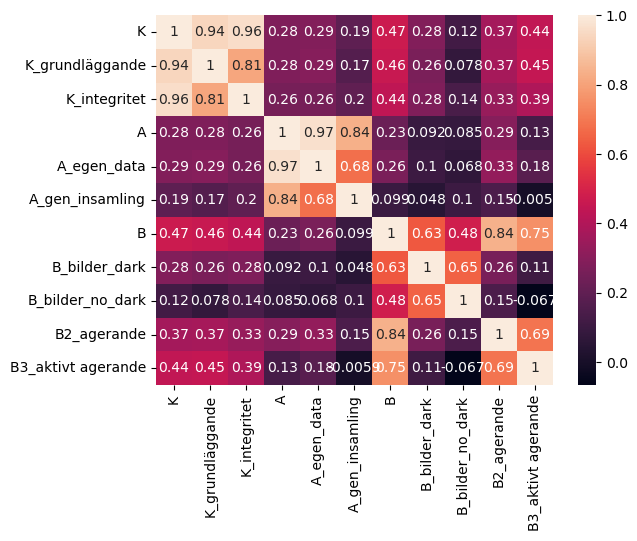

In [21]:
df_number = df_resp_sum.select_dtypes(include='number')
matrix = df_number.corr()
sns.heatmap(matrix,annot=True)
plt

<h1>Medelv√§rde av kategorier</h1>

<h1>Reliabilitetstest</h1>

In [22]:
def cronbach_alpha(df):
  k = df.shape[1]
  varians_total = df.sum(axis=1).var(ddof=1)
  varians_fr√•gor = df.var(axis=0,ddof=1).sum()

  alpha = (k / (k - 1)) * (1 - varians_fr√•gor / varians_total)

  return round(alpha, 3)

In [23]:
k_rel = cronbach_alpha(utvalda_k)
k1_rel = cronbach_alpha(utvalda_k1)
k2_rel = cronbach_alpha(utvalda_k2)

a_rel = cronbach_alpha(utvalda_a)
a1_rel = cronbach_alpha(utvalda_a1)
a2_rel = cronbach_alpha(utvalda_a2)

b_rel = cronbach_alpha(utvalda_b)
b1_dark_rel = cronbach_alpha(utvalda_b1_dark)
b1_no_dark_rel = cronbach_alpha(utvalda_b1_no_dark)
b2_rel = cronbach_alpha(utvalda_b2)
b3_rel = cronbach_alpha(utvalda_b3)

attityd = cronbach_alpha(df.iloc[:,29:])
beteende = cronbach_alpha(df.iloc[:, 6:17])
Beteende_bilder = cronbach_alpha(df.iloc[:, 11:17])
print("Kunskap =", k_rel, k1_rel, k2_rel, "attityd =", a_rel, a1_rel, a2_rel, "beteende =", b_rel, b1_dark_rel,b1_no_dark_rel,b2_rel,b3_rel)

Kunskap = 0.953 0.896 0.95 attityd = 0.914 0.92 0.674 beteende = 0.805 0.869 0.779 0.714 0.766


<h1>Korrelationstest</h1>

In [24]:
korrelation = df_resp_sum.iloc[:,4:].corr(method='pearson')

<module 'matplotlib.pyplot' from 'c:\\Users\\johan\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

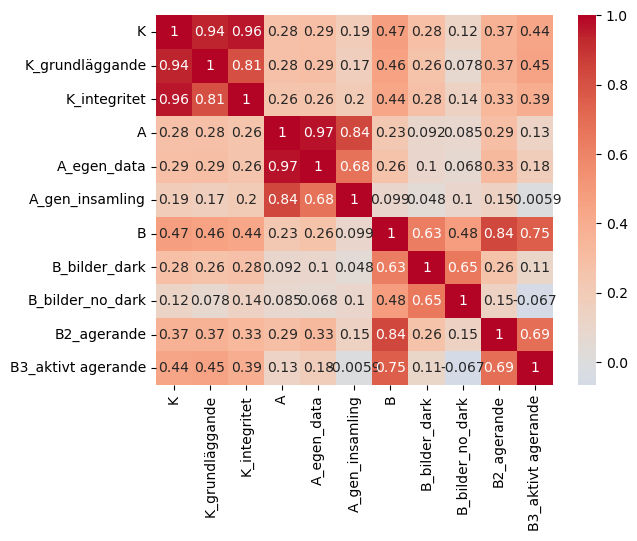

In [25]:
sns.heatmap(korrelation, annot=True, cmap='coolwarm', center=0)
plt

<h1>SEM</h1>

In [26]:
!pip install semopy

In [27]:
# 1. INSTALLERA n√∂dv√§ndiga paket f√∂rst via terminal:
# pip install pandas semopy openpyxl

import pandas as pd
from semopy import Model, Optimizer
from semopy.inspector import inspect

# # 2. L√ÑS IN DIN CSV
# df = pd.read_csv("Unders√∂kning om gymnasieelevers cookie-hantering (Svar) - Formul√§rsvar 1.csv")
# df.columns = df.columns.str.strip()

# 3. DEFINIERA KAB-GRUPPER baserat p√• index
behavior_cols = df.columns[5:17].tolist()
knowledge_cols = df.columns[17:29].tolist()
attitude_cols = df.columns[29:].tolist()

# 4. D√ñP OM kolumner till enklare namn
rename_map = {}
for i, col in enumerate(knowledge_cols):
    rename_map[col] = f"K{i+1}"
for i, col in enumerate(attitude_cols):
    rename_map[col] = f"A{i+1}"
for i, col in enumerate(behavior_cols):
    rename_map[col] = f"B{i+1}"

df_clean = df.rename(columns=rename_map)

# 5. SKAPA MODELL i semopy-syntax
model_desc = f"""
Knowledge =~ {' + '.join(rename_map[c] for c in knowledge_cols)}
Attitude  =~ {' + '.join(rename_map[c] for c in attitude_cols)}
Behavior  =~ {' + '.join(rename_map[c] for c in behavior_cols)}

Attitude ~ Knowledge
Behavior ~ Attitude
"""

# 6. Rensa bort tomma rader f√∂r SEM
df_clean = df_clean.dropna(subset=rename_map.values())

# 7. BYGG OCH TR√ÑNA MODELLEN
model = Model(model_desc)
model.fit(df_clean)

# 8. VISA RESULTAT
results = inspect(model)
print("\n--- SEM Resultat (koefficienter & p-v√§rden) ---")
print(results)





--- SEM Resultat (koefficienter & p-v√§rden) ---
        lval  op       rval  Estimate  Std. Err   z-value   p-value
0   Attitude   ~  Knowledge  0.325823  0.112675  2.891708  0.003832
1   Behavior   ~   Attitude -0.039366  0.029707 -1.325151  0.185121
2         K1   ~  Knowledge  1.000000         -         -         -
3         K2   ~  Knowledge  1.372005   0.14144  9.700267       0.0
4         K3   ~  Knowledge  0.965666  0.135439  7.129904       0.0
..       ...  ..        ...       ...       ...       ...       ...
72        K5  ~~         K5  1.746795  0.223279  7.823386       0.0
73        K6  ~~         K6  0.899686  0.125688  7.158081       0.0
74        K7  ~~         K7  1.242341  0.168913  7.354898       0.0
75        K8  ~~         K8  0.773994  0.114036  6.787285       0.0
76        K9  ~~         K9  0.801137  0.118907  6.737519       0.0

[77 rows x 7 columns]


In [28]:
from semopy.inspector import inspect

# H√§mta standardiserade v√§rden
estimates = inspect(model)

# R√§kna ut R¬≤ manuellt
def calculate_r2(est_df, dependent_var):
    effects = est_df[(est_df["op"] == "~") & (est_df["lval"] == dependent_var)]
    r2 = sum(effects["Estimate"]**2)
    return r2

dependent_vars = ["Attitude", "Behavior"]

print("\n--- R¬≤ f√∂r beroende latenta variabler ---")
for var in dependent_vars:
    r2_val = calculate_r2(estimates, var)
    print(f"{var}: {r2_val:.3f}")




--- R¬≤ f√∂r beroende latenta variabler ---
Attitude: 0.106
Behavior: 0.002


In [29]:
from semopy import semplot

# Skapa en PDF- eller PNG-bild av modellen
semplot(model, 'kab_model.png')  # eller .pdf
print("Modellen √§r sparad som kab_model.png")


Modellen √§r sparad som kab_model.png


<h1>T-test/ANOVA</h1>

***T-Test f√∂r grupper som k√§nner till/ inte k√§nner till GDPR***

-   Resultaten fr√•n t-testerna visar att det inte finns n√•gra statistiskt signifikanta skillnader i kunskap, attityd eller beteende mellan elever som rapporterar l√•g respektive h√∂g k√§nnedom om GDPR (p > 0.05). Detta tyder p√• att sj√§lvupplevd GDPR-k√§nnedom inte n√∂dv√§ndigtvis inneb√§r en djupare f√∂rst√•else f√∂r cookies, inte heller en mer integritetsmedveten attityd eller f√∂r√§ndrat beteende. Resultatet kan ses i ljuset av den s√• kallade privacy paradox, d√§r individer uttrycker oro f√∂r sin integritet men inte agerar i linje med denna oro. Det antyder att insatser som syftar till att √∂ka medvetenheten om integritet beh√∂ver g√• bortom ren informationsspridning och i st√§llet fokusera p√• att √∂ka faktisk f√∂rst√•else och anv√§ndarkompetens.

In [30]:
df_tTest = df_resp_sum.copy()

gdpr_k√§nnedom = df.iloc[:, 31]

df_tTest['Integritet_online'] = gdpr_k√§nnedom

l√•g_k√§nnedom = df_tTest[df_tTest['Integritet_online'] < 4]
h√∂g_k√§nnedom = df_tTest[df_tTest['Integritet_online'] > 4]

from scipy.stats import ttest_ind

t_k = ttest_ind(h√∂g_k√§nnedom['K'], l√•g_k√§nnedom['K'], nan_policy='omit')
t_a = ttest_ind(h√∂g_k√§nnedom['A'], l√•g_k√§nnedom['A'], nan_policy='omit')
t_b = ttest_ind(h√∂g_k√§nnedom['B'], l√•g_k√§nnedom['B'], nan_policy='omit')

print("üìò T-test: Kunskap (K)")
print(f"  t = {t_k.statistic:.3f}, p = {t_k.pvalue:.4f}")

print("üìó T-test: Attityd (A)")
print(f"  t = {t_a.statistic:.3f}, p = {t_a.pvalue:.4f}")

print("üìô T-test: Beteende (B)")
print(f"  t = {t_b.statistic:.3f}, p = {t_b.pvalue:.4f}")




üìò T-test: Kunskap (K)
  t = 4.043, p = 0.0001
üìó T-test: Attityd (A)
  t = 7.109, p = 0.0000
üìô T-test: Beteende (B)
  t = 3.071, p = 0.0027


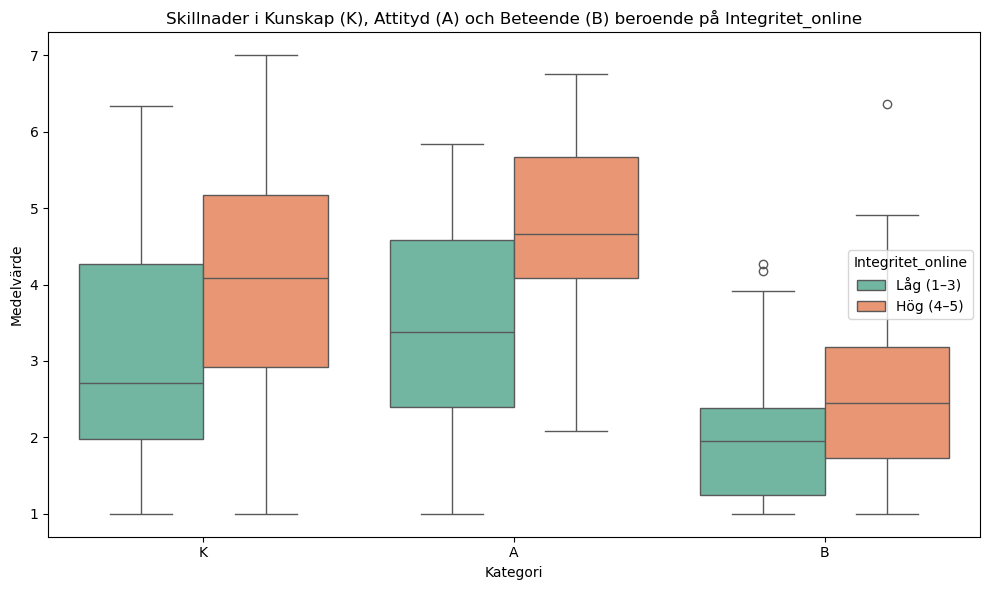

In [31]:
df_tTest['Integritet_online_grupp'] = df_tTest['Integritet_online'].apply(
    lambda x: 'L√•g (1‚Äì3)' if x < 4 else 'H√∂g (4‚Äì5)'
)

df_melted = df_tTest.melt(id_vars="Integritet_online_grupp", value_vars=["K", "A", "B"],
                          var_name="Kategori", value_name="V√§rde")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Kategori", y="V√§rde", hue="Integritet_online_grupp", palette="Set2")
plt.title("Skillnader i Kunskap (K), Attityd (A) och Beteende (B) beroende p√• Integritet_online")
plt.ylabel("Medelv√§rde")
plt.xlabel("Kategori")
plt.legend(title="Integritet_online")
plt.tight_layout()
plt.show()



***T-TEst f√∂r skillnad mellan k√∂n***

Resultaten fr√•n t-tester visar att det finns en statistiskt signifikant k√∂nsskillnad i b√•de kunskapsniv√• och beteende kopplat till cookies, men inte i attityd. M√§n och kvinnor skiljer sig allts√• i hur mycket de vet om cookies, samt hur de agerar i praktiken (t.ex. raderar cookies eller blockerar sp√•rning), men har en liknande inst√§llning till datainsamling. Det antyder att k√∂n kan vara en relevant faktor vid utformning av informationsinsatser, s√§rskilt om m√•let √§r att √∂ka faktisk f√∂rst√•else eller f√∂r√§ndra beteende. Att attityden d√§remot inte skiljer sig kan tyda p√• att b√•de m√§n och kvinnor i liknande grad v√§rderar digital integritet, men att de oms√§tter den i handling p√• olika s√§tt.

In [32]:
from scipy.stats import ttest_ind

# L√§gg till k√∂n i df_resp_sum (index 1 = k√∂nskolumn i ursprunglig df)


# Skapa tv√• grupper
kvinnor = df_resp_sum[df_resp_sum['K√∂n'] == 'Kvinna']
m√§n = df_resp_sum[df_resp_sum['K√∂n'] == 'Man']

# K√∂r t-tester f√∂r K, A, B
t_k = ttest_ind(kvinnor['K'], m√§n['K'], nan_policy='omit')
t_a = ttest_ind(kvinnor['A'], m√§n['A'], nan_policy='omit')
t_b = ttest_ind(kvinnor['B'], m√§n['B'], nan_policy='omit')

# Visa resultat
print("üìò T-test: Kunskap (K√∂nsskillnad)")
print(f"  t = {t_k.statistic:.3f}, p = {t_k.pvalue:.4f}")

print("üìó T-test: Attityd (K√∂nsskillnad)")
print(f"  t = {t_a.statistic:.3f}, p = {t_a.pvalue:.4f}")

print("üìô T-test: Beteende (K√∂nsskillnad)")
print(f"  t = {t_b.statistic:.3f}, p = {t_b.pvalue:.4f}")


üìò T-test: Kunskap (K√∂nsskillnad)
  t = -2.573, p = 0.0112
üìó T-test: Attityd (K√∂nsskillnad)
  t = 1.530, p = 0.1284
üìô T-test: Beteende (K√∂nsskillnad)
  t = -2.536, p = 0.0124


In [33]:
print(kvinnor['B'].mean(), m√§n['B'].mean())

2.049090909090909 2.5177383592017737


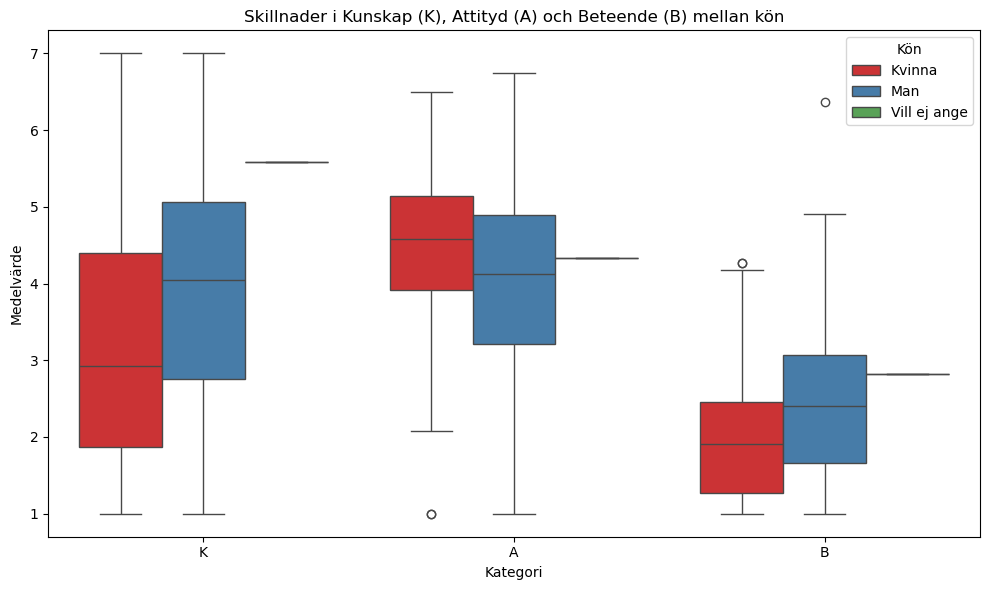

In [34]:
# G√∂r om till l√•ngform f√∂r seaborn
df_melted = df_resp_sum.melt(id_vars="K√∂n", value_vars=["K", "A", "B"], 
                             var_name="Kategori", value_name="V√§rde")

# Rita boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Kategori", y="V√§rde", hue="K√∂n", palette="Set1")
plt.title("Skillnader i Kunskap (K), Attityd (A) och Beteende (B) mellan k√∂n")
plt.ylabel("Medelv√§rde")
plt.xlabel("Kategori")
plt.legend(title="K√∂n")
plt.tight_layout()
plt.show()

In [35]:
from scipy.stats import ttest_rel

# Exempel ‚Äì byt till dina faktiska kolumnnamn!
t_stat, p_value = ttest_rel(df_resp_sum['B_bilder_no_dark'], df_resp_sum['B_bilder_dark'])

print("üìä Parat t-test ‚Äì ben√§genhet att neka cookies")
print(f"  t = {t_stat:.3f}, p = {p_value:.4f}")


üìä Parat t-test ‚Äì ben√§genhet att neka cookies
  t = 3.045, p = 0.0028


C:\Users\johan\AppData\Local\Temp\ipykernel_29632\3881499562.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")
C:\Users\johan\AppData\Local\Temp\ipykernel_29632\3881499562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")


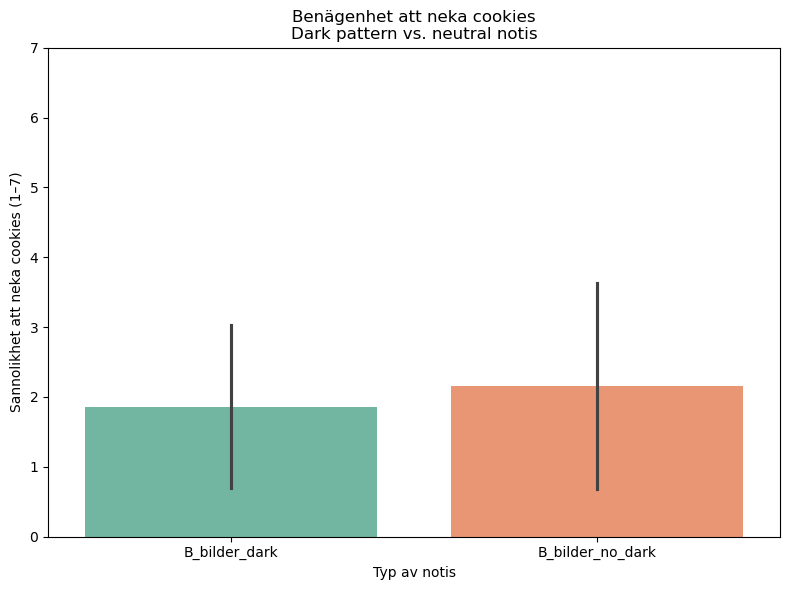

In [36]:
# Sm√§lt till l√•ng format f√∂r seaborn
df_melted = df_resp_sum.melt(value_vars=["B_bilder_dark", "B_bilder_no_dark"],
                           var_name="Typ av notis", value_name="Svar")

# Rita barplot med medelv√§rden
plt.figure(figsize=(8, 6))
sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")
plt.title("Ben√§genhet att neka cookies\nDark pattern vs. neutral notis")
plt.ylabel("Sannolikhet att neka cookies (1‚Äì7)")
plt.xlabel("Typ av notis")
plt.ylim(0, 7)
plt.tight_layout()
plt.show()

In [37]:
df_resp_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   K√∂n                 133 non-null    category
 1   √Örskurs             133 non-null    category
 2   Program             133 non-null    category
 3   Inv√•nare            133 non-null    category
 4   K                   133 non-null    float64 
 5   K_grundl√§ggande     133 non-null    float64 
 6   K_integritet        133 non-null    float64 
 7   A                   133 non-null    float64 
 8   A_egen_data         133 non-null    float64 
 9   A_gen_insamling     133 non-null    float64 
 10  B                   133 non-null    float64 
 11  B_bilder_dark       133 non-null    float64 
 12  B_bilder_no_dark    133 non-null    float64 
 13  B2_agerande         133 non-null    float64 
 14  B3_aktivt agerande  133 non-null    float64 
dtypes: category(4), float64(11)
memory u

<h1>T-TEST K√ñN<h1>

In [38]:
from scipy.stats import ttest_ind

# Dela upp datan baserat p√• k√∂n
kvinnor = df_resp_sum[df_resp_sum["K√∂n"] == "Kvinna"]["K"]
m√§n = df_resp_sum[df_resp_sum["K√∂n"] == "Man"]["K"]

# T-test (standard: equal_var=True antar lika varians)
t_stat, p_val = ttest_ind(kvinnor, m√§n, equal_var=False)  # Welch's t-test (s√§krare)

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")


T-statistik: -2.569
P-v√§rde: 0.012


In [39]:
from scipy.stats import ttest_ind

# Dela upp datan baserat p√• k√∂n
kvinnor = df_resp_sum[df_resp_sum["K√∂n"] == "Kvinna"]["A"]
m√§n = df_resp_sum[df_resp_sum["K√∂n"] == "Man"]["A"]

# T-test (standard: equal_var=True antar lika varians)
t_stat, p_val = ttest_ind(kvinnor, m√§n, equal_var=False)  # Welch's t-test (s√§krare)

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")

T-statistik: 1.548
P-v√§rde: 0.125


In [40]:
from scipy.stats import ttest_ind

# Dela upp datan baserat p√• k√∂n
kvinnor = df_resp_sum[df_resp_sum["K√∂n"] == "Kvinna"]["B"]
m√§n = df_resp_sum[df_resp_sum["K√∂n"] == "Man"]["B"]

# T-test (standard: equal_var=True antar lika varians)
t_stat, p_val = ttest_ind(kvinnor, m√§n, equal_var=False)  # Welch's t-test (s√§krare)

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")

T-statistik: -2.634
P-v√§rde: 0.010


<h1>T-TEST √ÖRSKURS<h1>

In [41]:
df_resp_sum.head()

K√∂n    √Örskurs            Program Inv√•nare     K  K_grundl√§ggande  \
0     Man  √Örskurs 3     Naturvetenskap    medel  3.25         1.833333   
1     Man  √Örskurs 3  Samh√§llsvetenskap    medel  1.58         2.166667   
2  Kvinna  √Örskurs 3     Naturvetenskap    liten  1.67         2.333333   
3  Kvinna  √Örskurs 3  Samh√§llsvetenskap    liten  2.33         1.166667   
4  Kvinna  √Örskurs 3     Naturvetenskap    liten  5.08         4.666667   

   K_integritet         A  A_egen_data  A_gen_insamling         B  \
0      4.666667  5.833333        5.500             6.50  2.181818   
1      1.000000  4.666667        4.625             4.75  1.545455   
2      1.000000  5.916667        6.000             5.75  1.363636   
3      3.500000  4.833333        4.375             5.75  1.000000   
4      5.500000  4.416667        4.250             4.75  2.727273   

   B_bilder_dark  B_bilder_no_dark  B2_agerande  B3_aktivt agerande  
0       1.000000               3.5     3.666667                 1.0  
1       1.000000               2.0     2.333333                 1.0  
2       1.000000               1.0     2.333333                 1.0  
3       1.000000               1.0     1.000000                 1.0  
4       1.666667               2.0     4.000000                 3.0

In [42]:
from scipy.stats import ttest_ind

# Filtrera ut elever i √•rskurs 1 och 2
√•r1 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 1"]["K"]
√•r2 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 3"]["K"]

# T-test
t_stat, p_val = ttest_ind(√•r1, √•r2, equal_var=False)  # Welch's t-test

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")

T-statistik: 1.830
P-v√§rde: 0.071


In [43]:
from scipy.stats import ttest_ind

# Filtrera ut elever i √•rskurs 1 och 2
√•r1 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 1"]["A"]
√•r2 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 3"]["A"]

# T-test
t_stat, p_val = ttest_ind(√•r1, √•r2, equal_var=False)  # Welch's t-test

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")

T-statistik: -1.829
P-v√§rde: 0.071


In [44]:
from scipy.stats import ttest_ind

# Filtrera ut elever i √•rskurs 1 och 2
√•r1 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 1"]["B"]
√•r2 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 3"]["B"]

# T-test
t_stat, p_val = ttest_ind(√•r1, √•r2, equal_var=False)  # Welch's t-test

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")

T-statistik: 1.327
P-v√§rde: 0.188


<h1>MEDELV√ÑRDE<h1>

In [45]:
df_kategoriserad

K  K_grundl√§ggande  K_integritet         A  A_egen_data  \
0  3.711153         3.552632      3.869674  4.224937     4.084586   

   A_gen_insamling         B  B_bilder_dark  B_bilder_no_dark  B2_agerande  \
0         4.505639  2.343814       1.859649          2.161654     2.897243   

   B3_aktivt agerande  
0             2.39599

In [46]:
# Gruppera f√∂rst som vanligt
medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['K']].mean()

# G√∂r om k√∂n till kolumner
tabell_K = medel_per_√•rskurs_k√∂n.unstack('K√∂n')

# Platta kolumnindex f√∂r tydlighet
tabell_K.columns = [f"{col[0]} - {col[1]}" for col in tabell_K.columns]

# Visa tabellen
print(tabell_K)

           K - Kvinna   K - Man  K - Vill ej ange
√Örskurs                                          
√Örskurs 1    3.250556  4.071864               NaN
√Örskurs 2    4.155000  3.545556              5.58
√Örskurs 3    3.000000  3.886429               NaN


C:\Users\johan\AppData\Local\Temp\ipykernel_29632\1890733522.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['K']].mean()


In [47]:
utvalda_k1.describe()

Jag har god kunskap om cookies.   \
count                        133.000000   
mean                           2.879699   
std                            1.581319   
min                            1.000000   
25%                            1.000000   
50%                            3.000000   
75%                            4.000000   
max                            7.000000   

       Jag k√§nner till vad cookies anv√§nds till.   \
count                                  133.000000   
mean                                     3.526316   
std                                      1.885266   
min                                      1.000000   
25%                                      2.000000   
50%                                      3.000000   
75%                                      5.000000   
max                                      7.000000   

       Jag vet skillnaden mellan n√∂dv√§ndiga och icke-n√∂dv√§ndiga cookies.   \
count                                         133.000000                    
mean                                            2.744361                    
std                                             1.782296                    
min                                             1.000000                    
25%                                             1.000000                    
50%                                             2.000000                    
75%                                             4.000000                    
max                                             7.000000                    

       Jag vet att det g√•r att anpassa eller neka cookies n√§r jag bes√∂ker en ny webbplats.   \
count                                         133.000000                                      
mean                                            4.661654                                      
std                                             2.218678                                      
min                                             1.000000                                      
25%                                             3.000000                                      
50%                                             5.000000                                      
75%                                             7.000000                                      
max                                             7.000000                                      

       Jag k√§nner till att cookies anv√§nds f√∂r grundl√§ggande funktioner p√• en hemsida.   \
count                                         133.000000                                  
mean                                            3.661654                                  
std                                             1.945808                                  
min                                             1.000000                                  
25%                                             2.000000                                  
50%                                             4.000000                                  
75%                                             5.000000                                  
max                                             7.000000                                  

       Jag k√§nner till att cookies anv√§nds f√∂r √∂ka anv√§ndarupplevelsen p√• en hemsida.   
count                                         133.000000                                
mean                                            3.842105                                
std                                             2.006966                                
min                                             1.000000                                
25%                                             2.000000                                
50%                                             4.000000                                
75%                                             5.000000                                
max                                    

In [48]:
utvalda_k2.describe()

Jag k√§nner till att cookies kan lagra personliga uppgifter som jag l√§mnat p√• en webbplats.   \
count                                         133.000000                                             
mean                                            4.105263                                             
std                                             2.171660                                             
min                                             1.000000                                             
25%                                             2.000000                                             
50%                                             4.000000                                             
75%                                             6.000000                                             
max                                             7.000000                                             

       Jag vet att cookies kan anv√§ndas f√∂r att samla in information om mitt beteende online.   \
count                                         133.000000                                         
mean                                            4.067669                                         
std                                             2.111281                                         
min                                             1.000000                                         
25%                                             2.000000                                         
50%                                             4.000000                                         
75%                                             6.000000                                         
max                                             7.000000                                         

       Jag √§r medveten om att cookies kan anv√§ndas f√∂r att bygga en profil av mig som internetanv√§ndare.   \
count                                         133.000000                                                    
mean                                            3.924812                                                    
std                                             2.179881                                                    
min                                             1.000000                                                    
25%                                             2.000000                                                    
50%                                             4.000000                                                    
75%                                             6.000000                                                    
max                                             7.000000                                                    

       Jag k√§nner till att cookies kan forts√§tta sp√•ra mitt beteende n√§r jag bes√∂ker andra hemsidor.   \
count                                         133.000000                                                
mean                                            3.473684                                                
std                                             2.200478                                                
min                                             1.000000                                                
25%                                             1.000000                                                
50%                                             3.000000                                                
75%                                             5.000000                                                
max                                             7.000000                                                

       Jag vet att cookies kan p√•verka hur mycket reklam jag ser och vilken typ av reklam jag f√•r.   \
count                                         133.000000                                              
mean                                            4.15037

In [49]:
# Gruppera f√∂rst som vanligt
medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['A']].mean()

# G√∂r om k√∂n till kolumner
tabell_A = medel_per_√•rskurs_k√∂n.unstack('K√∂n')

# Platta kolumnindex f√∂r tydlighet
tabell_A.columns = [f"{col[0]} - {col[1]}" for col in tabell_A.columns]

# Visa tabellen
print(tabell_A)



           A - Kvinna   A - Man  A - Vill ej ange
√Örskurs                                          
√Örskurs 1    4.337963  4.087571               NaN
√Örskurs 2    4.208333  3.240741          4.333333
√Örskurs 3    4.586538  4.619048               NaN


C:\Users\johan\AppData\Local\Temp\ipykernel_29632\1293533543.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['A']].mean()


In [50]:
df_kategoriserad.describe()

K  K_grundl√§ggande  K_integritet         A  A_egen_data  \
count  1.000000         1.000000      1.000000  1.000000     1.000000   
mean   3.711153         3.552632      3.869674  4.224937     4.084586   
std         NaN              NaN           NaN       NaN          NaN   
min    3.711153         3.552632      3.869674  4.224937     4.084586   
25%    3.711153         3.552632      3.869674  4.224937     4.084586   
50%    3.711153         3.552632      3.869674  4.224937     4.084586   
75%    3.711153         3.552632      3.869674  4.224937     4.084586   
max    3.711153         3.552632      3.869674  4.224937     4.084586   

       A_gen_insamling         B  B_bilder_dark  B_bilder_no_dark  \
count         1.000000  1.000000       1.000000          1.000000   
mean          4.505639  2.343814       1.859649          2.161654   
std                NaN       NaN            NaN               NaN   
min           4.505639  2.343814       1.859649          2.161654   
25%           4.505639  2.343814       1.859649          2.161654   
50%           4.505639  2.343814       1.859649          2.161654   
75%           4.505639  2.343814       1.859649          2.161654   
max           4.505639  2.343814       1.859649          2.161654   

       B2_agerande  B3_aktivt agerande  
count     1.000000             1.00000  
mean      2.897243             2.39599  
std            NaN                 NaN  
min       2.897243             2.39599  
25%       2.897243             2.39599  
50%       2.897243             2.39599  
75%       2.897243             2.39599  
max       2.897243             2.39599

In [51]:
utvalda_a1.describe()

Jag bryr mig om att hemsidor hanterar mina personuppgifter p√• ett ansvarsfullt s√§tt.   \
count                                         133.000000                                       
mean                                            4.639098                                       
std                                             1.896322                                       
min                                             1.000000                                       
25%                                             3.000000                                       
50%                                             5.000000                                       
75%                                             6.000000                                       
max                                             7.000000                                       

       Jag v√§rnar om min personliga integritet online.    \
count                                         133.000000   
mean                                            4.443609   
std                                             1.768468   
min                                             1.000000   
25%                                             3.000000   
50%                                             4.000000   
75%                                             6.000000   
max                                             7.000000   

       Jag √§r omsorgsfull med vilka uppgifter jag l√§mnar till hemsidor.   \
count                                         133.000000                   
mean                                            4.082707                   
std                                             1.753979                   
min                                             1.000000                   
25%                                             3.000000                   
50%                                             4.000000                   
75%                                             5.000000                   
max                                             7.000000                   

       Jag bryr mig om att f√∂retag samlar in information om mig som person.   \
count                                         133.000000                       
mean                                            4.203008                       
std                                             1.921802                       
min                                             1.000000                       
25%                                             3.000000                       
50%                                             4.000000                       
75%                                             6.000000                       
max                                             7.000000                       

       Jag bryr mig om att f√∂retag samlar in information om mitt beteende online.   \
count                                         133.000000                             
mean                                            4.067669                             
std                                             1.818239                             
min                                             1.000000                             
25%                                             3.000000                             
50%                                             4.000000                             
75%                                             5.000000                             
max                                             7.000000                             

       Jag k√§nner oro √∂ver att information som samlas in via cookies kan anv√§ndas p√• ett felaktigt s√§tt.   \
count                                          133.00000                                                    
mean                                             3.62406                                                    
std                                              1.88937                         

In [52]:
utvalda_a2.describe()

Jag tycker att hemsidor b√∂r f√∂rklara tydligt vad varje cookie anv√§nds till.   \
count                                         133.000000                              
mean                                            4.729323                              
std                                             2.015575                              
min                                             1.000000                              
25%                                             4.000000                              
50%                                             5.000000                              
75%                                             7.000000                              
max                                             7.000000                              

       Jag tycker att det √§r fel att samla in personuppgifter utan att informera anv√§ndaren.   \
count                                         133.000000                                        
mean                                            5.308271                                        
std                                             1.838892                                        
min                                             1.000000                                        
25%                                             4.000000                                        
50%                                             6.000000                                        
75%                                             7.000000                                        
max                                             7.000000                                        

       Jag tycker att f√∂retag inskr√§nker p√• m√§nniskors privatliv n√§r de sp√•rar aktivitet via cookies.     \
count                                         133.000000                                                   
mean                                            4.473684                                                   
std                                             1.909224                                                   
min                                             1.000000                                                   
25%                                             3.000000                                                   
50%                                             4.000000                                                   
75%                                             6.000000                                                   
max                                             7.000000                                                   

       Jag tycker att det √§r rimligt att betala med personlig data ist√§llet f√∂r pengar f√∂r att anv√§nda tj√§nster online.   
count                                         133.000000                                                                  
mean                                            3.511278                                                                  
std                                             1.635851                                                                  
min                                             1.000000                                                                  
25%                                             2.000000                                                                  
50%                                             4.000000                                                                  
75%                                             5.000000                                                                  
max                                             6.000000

In [53]:
df["Vilken √•rskurs g√•r du i?"].value_counts()

Vilken √•rskurs g√•r du i?
√Örskurs 1    77
√Örskurs 3    40
√Örskurs 2    16
Name: count, dtype: int64

In [54]:
# Gruppera f√∂rst som vanligt
medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['B']].mean()

# G√∂r om k√∂n till kolumner
tabell_B = medel_per_√•rskurs_k√∂n.unstack('K√∂n')

# Platta kolumnindex f√∂r tydlighet
tabell_A.columns = [f"{col[0]} - {col[1]}" for col in tabell_B.columns]

# Visa tabellen
print(tabell_B)

                  B                       
K√∂n          Kvinna       Man Vill ej ange
√Örskurs                                   
√Örskurs 1  1.984848  2.573190          NaN
√Örskurs 2  2.348485  2.333333     2.818182
√Örskurs 3  2.024476  2.402597          NaN


C:\Users\johan\AppData\Local\Temp\ipykernel_29632\238364228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['B']].mean()


In [56]:
utvalda_b1_dark.describe()

Jag v√§ljer "Godk√§nn alla cookies".  Jag v√§ljer "Till√•t alla".   \
count                          133.000000                  133.000000   
mean                             1.781955                    1.977444   
std                              1.275280                    1.411351   
min                              1.000000                    1.000000   
25%                              1.000000                    1.000000   
50%                              1.000000                    1.000000   
75%                              2.000000                    3.000000   
max                              6.000000                    6.000000   

       Jag v√§ljer "Acceptera alla cookies". .1  
count                               133.000000  
mean                                  1.819549  
std                                   1.248239  
min                                   1.000000  
25%                                   1.000000  
50%                                   1.000000  
75%                                   2.000000  
max                                   6.000000

In [57]:
utvalda_b1_no_dark.describe()

Jag v√§ljer "Acceptera alla cookies".   Jag v√§ljer "Till√•t alla". .1
count                             133.000000                    133.000000
mean                                2.263158                      2.060150
std                                 1.687273                      1.570367
min                                 1.000000                      1.000000
25%                                 1.000000                      1.000000
50%                                 1.000000                      1.000000
75%                                 3.000000                      3.000000
max                                 6.000000                      6.000000

In [60]:
df_kategoriserad

K  K_grundl√§ggande  K_integritet         A  A_egen_data  \
0  3.711153         3.552632      3.869674  4.224937     4.084586   

   A_gen_insamling         B  B_bilder_dark  B_bilder_no_dark  B2_agerande  \
0         4.505639  2.343814       1.859649          2.161654     2.897243   

   B3_aktivt agerande  
0             2.39599

In [58]:
utvalda_b2.describe()

Mina val av cookies √§r olika beroende p√• vilken sida jag bes√∂ker.  \
count                                         133.000000                   
mean                                            4.406015                   
std                                             2.273156                   
min                                             1.000000                   
25%                                             2.000000                   
50%                                             5.000000                   
75%                                             7.000000                   
max                                             7.000000                   

       Jag undviker vissa webbplatser p√• grund av hur de hanterar cookies.   \
count                                         133.000000                      
mean                                            2.345865                      
std                                             1.821775                      
min                                             1.000000                      
25%                                             1.000000                      
50%                                             1.000000                      
75%                                             3.000000                      
max                                             7.000000                      

       Jag l√§ser igenom informationen om cookies innan jag g√∂r ett val.   
count                                         133.000000                  
mean                                            1.939850                  
std                                             1.713403                  
min                                             1.000000                  
25%                                             1.000000                  
50%                                             1.000000                  
75%                                             2.000000                  
max                                             7.000000

In [59]:
utvalda_b3.describe()

Jag raderar cookies regelbundet i min webbl√§sare.   \
count                                         133.000000    
mean                                            1.932331    
std                                             1.818239    
min                                             1.000000    
25%                                             1.000000    
50%                                             1.000000    
75%                                             2.000000    
max                                             7.000000    

       Jag har n√•gon g√•ng √§ndrat inst√§llningarna f√∂r cookies i min webbl√§sare.   \
count                                         133.000000                          
mean                                            2.360902                          
std                                             2.157925                          
min                                             1.000000                          
25%                                             1.000000                          
50%                                             1.000000                          
75%                                             3.000000                          
max                                             7.000000                          

       Jag anv√§nder inst√§llningar eller program som blockerar sp√•rning eller reklam.    
count                                         133.000000                                
mean                                            2.894737                                
std                                             2.397167                                
min                                             1.000000                                
25%                                             1.000000                                
50%                                             1.000000                                
75%                                             5.000000                                
max                                             7.000000